In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


In [2]:
df=pd.read_csv('38976_TJ-II_Mirnov_coil.TXT', sep=' ',header=None, names=('time', 'sig'))

In [66]:
a=df.loc[(df['time']>=1000) &(df['time']<=1075)]#деляем кусок сигнала в нужном временном диапазоне

In [67]:
FD=1000/(a['time'].iloc[1]-a['time'].iloc[0])

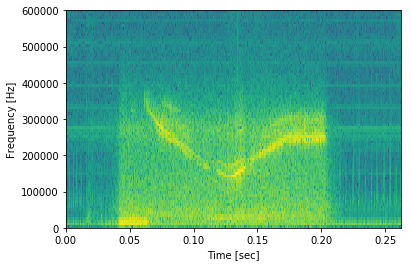

In [68]:
f,  t,Sxx = signal.spectrogram(df['sig'], FD)   #получаем исходную спектрограмму
fig, ax=plt.subplots()
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
ax.set_ylim(0, 6e5)
#plt.savefig(filename+'/raw_spectrogram')
plt.show()

In [69]:
spectrum = np.fft.rfft(a['sig']) #делаем фурье-спектр

In [70]:
N=len(a)

In [71]:
freqs=np.fft.rfftfreq(N, 1./FD) #создаем массив частот

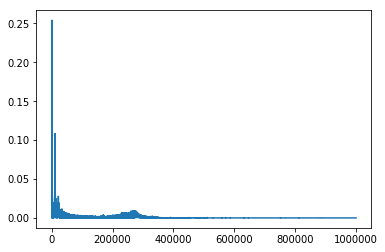

In [72]:
plt.plot(np.fft.rfftfreq(N, 1./FD), np.abs(spectrum)/N)

In [20]:
freqtocheck=float(input()) # вокруг какой частоты смотреть бикогерентность

200


In [40]:
len(spectrum)

22081

In [21]:
dotstocheck=int(input()) # сколько точек вокруг этой частоты посмотреть

30


In [41]:
len(freqs)

22081

In [78]:
k=0

In [79]:
while(freqs[k]<300000): # смотрим, в каком элементе массива находится интересующая нас частота (что-то нумпай такой возможности решил не давать)

    k+=1

In [80]:
k

22501

In [96]:
bispectr=np.array([])
x=np.array([])
y=np.array([])
bispectrhelp=np.array([])

In [97]:
for i in range(0, 22501, 20):#range(max(k-dotstocheck, 0), min(k+dotstocheck, len(spectrum))):  #вычисляем бикогеренцию по формуле из википедии в выделенном диапазоне
    
    for j in range (0,22501, 20):#range(max(k-dotstocheck, 0), min(k+dotstocheck, len(spectrum))):
        
        bispectrhelp=np.append(bispectrhelp, np.abs(spectrum[i]*spectrum[j]*np.conj(spectrum[i+j])))#/np.abs(spectrum[i])/np.abs(spectrum[j])/np.abs(np.conj(spectrum[i+j])))

    bispectr=np.append(bispectr,bispectrhelp)
    bispectrhelp=np.array([])
    x=np.append(x, freqs[i])

In [98]:
len(bispectr)

1267876

In [99]:
len(x)

1126

In [100]:
bispectr.shape=(1126,1126) #( k+dotstocheck-max(k-dotstocheck, 0),k+dotstocheck-max(k-dotstocheck, 0)) #делаем 2-д массив для тепловой карты

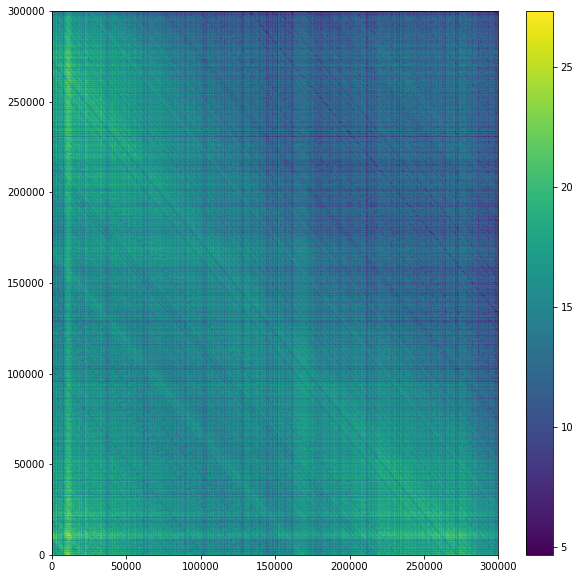

In [102]:
#x=np.array(freqs[max(k-dotstocheck, 0):min(k+dotstocheck, len(spectrum)-1)])
#y=np.array(freqs[max(k-dotstocheck, 0):min(k+dotstocheck, len(spectrum)-1)])

fig, axes=plt.subplots(figsize=(10,10))
image=axes.pcolormesh(x, x, np.log(bispectr))
fig.colorbar(image)
